In [1]:
#!pip install pystan

In [10]:
# importing libraries

import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [11]:
df = pd.read_csv(r'C:\Users\Ice Asortse\Desktop\GOOG _train.csv')
df.head()                 

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/3/2010,262.266968,265.464966,261.559601,264.309296,264.309296,3729500
1,5/4/2010,262.276917,262.386505,251.163574,252.239548,252.239548,12198000
2,5/5/2010,249.554611,256.897095,249.300568,253.928207,253.928207,9198600
3,5/6/2010,253.425095,257.793732,229.141129,248.403915,248.403915,10037600
4,5/7/2010,249.051498,251.716507,239.766296,245.649246,245.649246,10216000


In [12]:
df = df[['Date', 'Open']]
df.head()

,Date,Open
0,5/3/2010,262.266968
1,5/4/2010,262.276917
2,5/5/2010,249.554611
3,5/6/2010,253.425095
4,5/7/2010,249.051498


In [13]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [14]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2010-05-03,231.772807,187.166946,278.639287
1,2010-05-04,232.940204,189.682850,279.736292
2,2010-05-05,233.190246,183.974819,281.115777
3,2010-05-06,233.559680,184.643138,279.793915
4,2010-05-07,233.614356,184.575184,282.767366
...,...,...,...,...
2273,2020-01-01,1275.145143,1209.408490,1338.655359
2274,2020-02-01,1304.084991,1231.384260,1372.072314
2275,2020-03-01,1320.992010,1236.398340,1402.224611
2276,2020-04-01,1307.351938,1216.714292,1397.710396


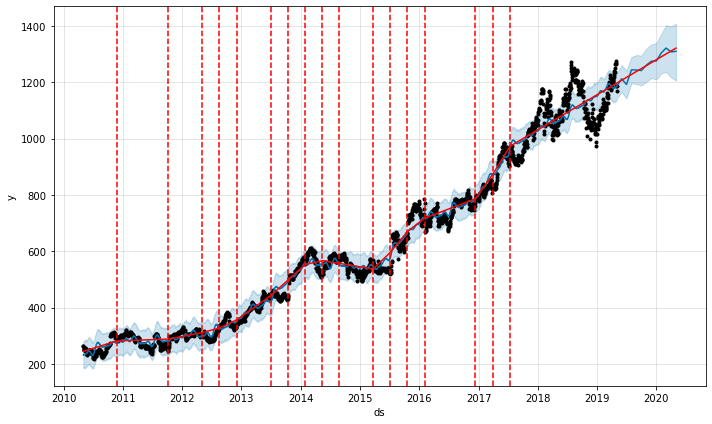

In [16]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

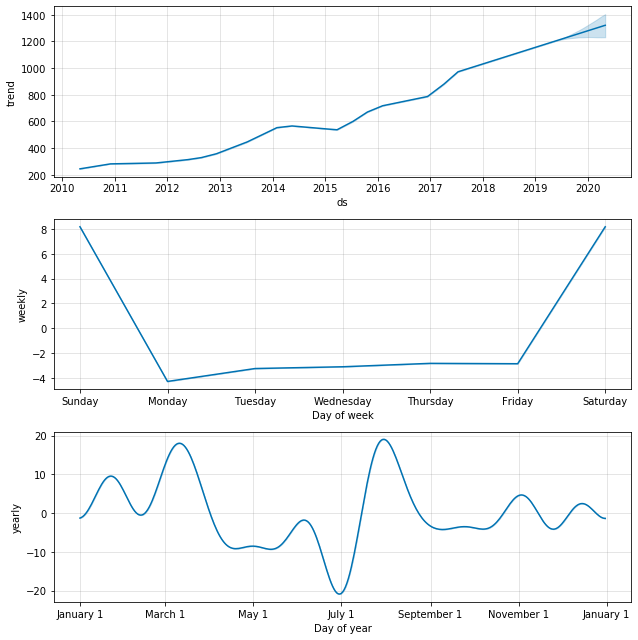

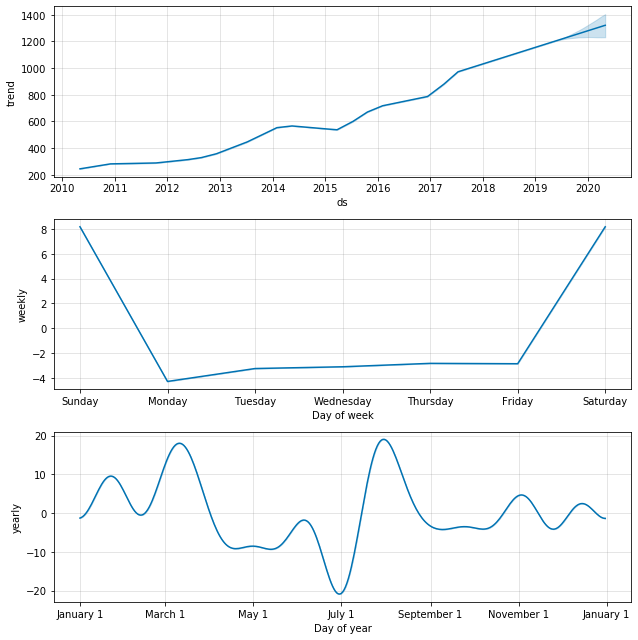

In [17]:
m.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


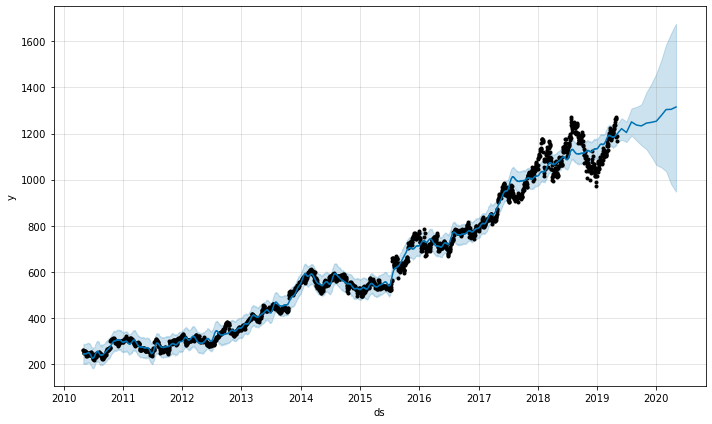

In [18]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)